The aim of this exercise is to train you in debugging networks using the good old print function and also tensorboard. To simulate poor training, we will train a multilayer perceptron using the CIFAR data.

1. Use the CIFAR data set reader from the first homework and read the CIFAR-10 files again. 
2. Apply random noise to the image 
3. Convert the image to float and scale to [0.0, 1.0] by dividing the pixel values by the highest pixel value.
4. Convert all labels to onehot encoding
5. Build a 3-layer multilayer perceptron of size [512, 256, 128]. 
6. Create a tensorboard summary for plotting the histogram of the weights of the three layers.
7. Also write the cost / loss at the end of each epoch to tensorboard.
8. Train the network with learning rates of [0.1, 0.01, 0.001]. You will notice that the network will not converge well.
9. Submit the snapshot of the histograms for the three learning rates. Describe your observations.



(32, 32, 3)


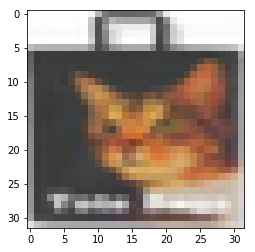

In [33]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd 

#1. Use the CIFAR data set reader from the first homework and read the CIFAR-10 files again. 
files = glob.glob(
    "/Users/omerorhan/Desktop/UCSC/Deep Learning/cifar-10-batches-py/data_batch*")

def unpickle(file, types):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes').get(types)

data = np.concatenate([unpickle(x, b'data') for x in files])
labels = np.concatenate([unpickle(x, b'labels') for x in files])
data = data.reshape([-1, 3, 32, 32]).astype(np.uint8)

oneimage = data[3000].transpose(1, 2, 0)
print(oneimage.shape)
plt.imshow(oneimage)



In [34]:
#2. Apply random noise to the image 
mean = 1   # some constant
std = 1    # some constant (standard deviation)
noisy_data = data + np.random.normal(mean, std, data.shape)

#3. Convert the image to float and scale to [0.0, 1.0] by dividing the pixel values by the highest pixel value.
noisy_data = noisy_data.astype(float)
noisy_data = np.divide(noisy_data, np.amax(noisy_data[0]))



In [53]:
#4. Convert all labels to onehot encoding
n_values = np.max(labels) + 1
labelsonehot_encoding = np.eye(n_values)[labels]




In [57]:
# Hyper-parameters

print(noisy_data[0].shape)
learningrate = 0.001
nepochs = 10
batch_size = 512

nhidden1 = 512
nhidden2 = 256 
nhidden3 = 128 
ninput = 3012
noutput = 10

(3, 32, 32)


In [54]:
#5. Build a 3-layer multilayer perceptron of size [512, 256, 128]. 

weights = \
{
        'h1': tf.Variable(tf.random_normal([ninput, nhidden1])),
        'h2': tf.Variable(tf.random_normal([nhidden1, nhidden2])),
        'h3': tf.Variable(tf.random_normal([nhidden2, nhidden3])),
        'out': tf.Variable(tf.random_normal([nhidden3, noutput]))
}

biases = \
{
    'b1': tf.Variable(tf.random_normal([nhidden1])),
    'b2': tf.Variable(tf.random_normal([nhidden2])),
    'b3': tf.Variable(tf.random_normal([nhidden3])),
    'out': tf.Variable(tf.random_normal([noutput]))
}


def multiperceptron(x):
    l1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    l2 = tf.nn.sigmoid(tf.add(tf.matmul(l1, weights['h2']), biases['b2']))
    outl = tf.nn.sigmoid(tf.add(tf.matmul(l2, weights['out']), biases['out']))
    return outl